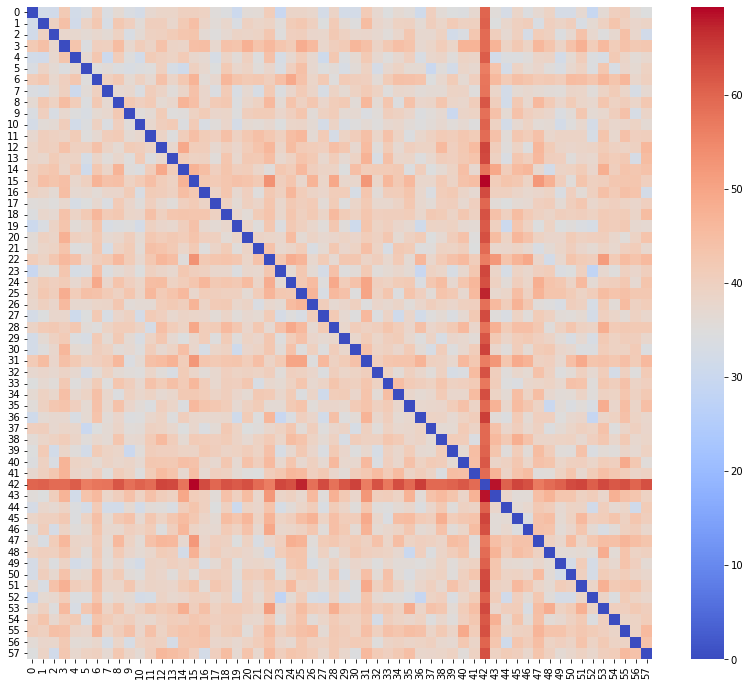

<Figure size 1152x1008 with 0 Axes>

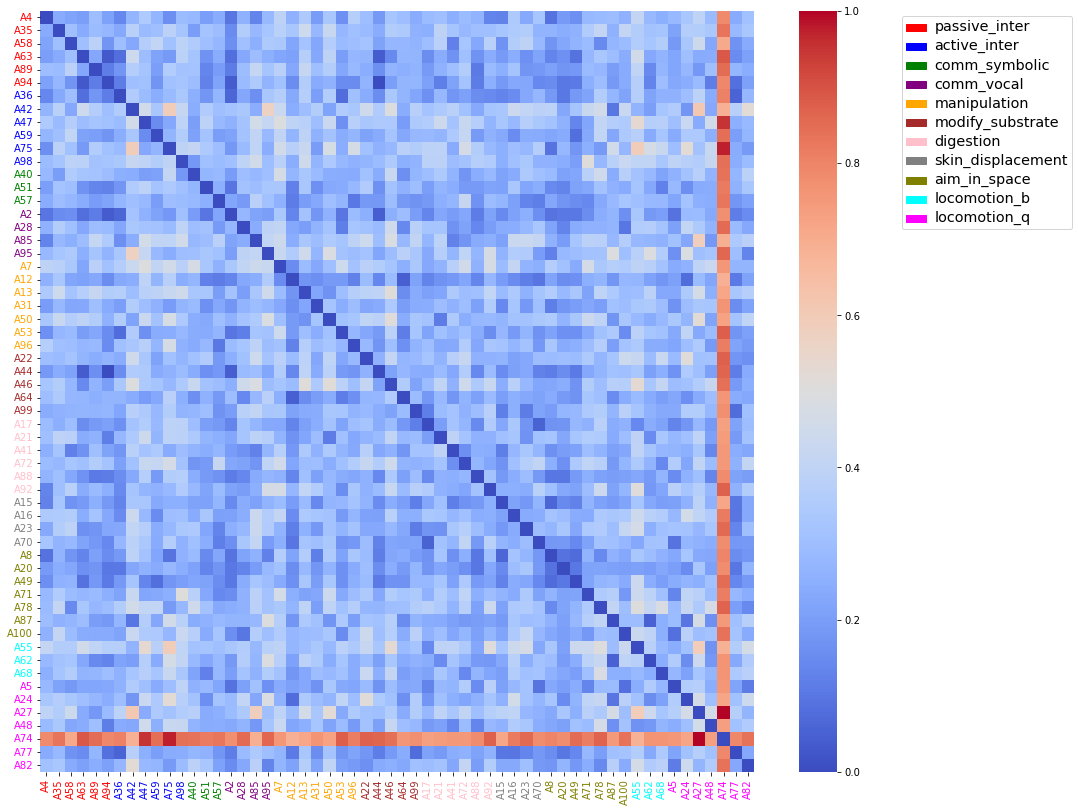

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

RDM101_1_LOTC=pd.read_csv(r'C:\Program Files (x86)\Umram\ActionClusters Project\ActionClusters(mixed)\Experiment_Folder\Output\Umur\RDM102_PPC.csv',header=None)

RDM101_1_LOTC

data = RDM101_1_LOTC.values  
global_min = data.min().min()
global_max = data.max().max()

# Scale the DataFrame
data = (data - global_min) / (global_max - global_min)

scaled_df2 = pd.DataFrame(data, index=RDM101_1_LOTC.index, columns=RDM101_1_LOTC.columns)



df = RDM101_1_LOTC
plt.figure(figsize=(14, 12))

heatmap=sns.heatmap(df, cmap='coolwarm')
plt.show()


df.index = df.index + 1
df.columns = df.columns + 1



mapping = {
    1: 2,
    2: 4,
    3: 5,
    4: 7,
    5: 8,
    6: 12,
    7: 13,
    8: 15,
    9: 16,
    10: 17,
    11: 20,
    12: 21,
    13: 22,
    14: 23,
    15: 24,
    16: 27,
    17: 28,
    18: 31,
    19: 35,
    20: 36,
    21:40,
    22:41,
    23:42,
    24:44,
    25:46,
    26:47,
    27:48,
    28:49,
    29:50,
    30:51,
    31:53,
    32:55,
    33:57,
    34:58,
    35:59,
    36:62,
    37:63,
    38:64,
    39:68,
    40:70,
    41:71,
    42:72,
    43:74,
    44:75,
    45:77,
    46:78,
    47:82, 
    48 :85, 
    49 :87, 
    50 :88, 
    51 :89, 
    52 :92, 
    53 :94, 
    54 :95, 
    55 :96, 
    56 :98, 
    57 :99, 
    58 :100
}

df.rename(index=mapping,columns=mapping, inplace=True)

groups = [
    ('passive_inter', [4, 35, 58, 63, 89, 94]),
    ('active_inter', [36, 42, 47, 59, 75, 98]),
    ('comm_symbolic', [40, 51, 57]),
    ('comm_vocal', [2, 28, 85, 95]),
    ('manipulation', [7, 12, 13, 31, 50, 53, 96]),
    ('modify_substrate', [22, 44, 46, 64, 99]),
    ('digestion', [17, 21, 41, 72,88,92]),
    ('skin_displacement', [15, 16, 23, 70]),
    ('aim_in_space', [8, 20, 49, 71, 78, 87, 100]),
    ('locomotion_b', [55, 62, 68]),
    ('locomotion_q', [5,24,27,48,74, 77, 82])
]
order = [index for group in groups for index in group[1]]
df = df.reindex(order)
df = df[order]


data = df.values  
lower_triangle_indices = np.tril_indices(data.shape[0], -1)

max_val = np.max(np.abs(data[lower_triangle_indices]))
min_val = np.min(data[lower_triangle_indices])
data[lower_triangle_indices] = (data[lower_triangle_indices] - min_val) / (max_val - min_val)
data.T[lower_triangle_indices] = data[lower_triangle_indices]
scaled_df = pd.DataFrame(data, index=df.index, columns=df.columns)



import matplotlib.patches as mpatches


scaled_df.index = scaled_df.index.map(str).map('A{}'.format)
scaled_df.columns = scaled_df.columns.map(str).map('A{}'.format)  
plt.figure(figsize=(16, 14))


scaled_df

plt.figure(figsize=(16, 14))
heatmap=sns.heatmap(scaled_df, cmap='coolwarm')
yticks = heatmap.get_yticklabels()
xticks=heatmap.get_xticklabels()
colors = ['red', 'blue', 'green', 'purple', 'orange', 'brown', 'pink', 'gray', 'olive', 'cyan', 'magenta']
groups = [
    ('passive_inter', [4, 35, 58, 63, 89, 94]),
    ('active_inter', [36, 42, 47, 59, 75, 98]),
    ('comm_symbolic', [40, 51, 57]),
    ('comm_vocal', [2, 28, 85, 95]),
    ('manipulation', [7, 12, 13, 31, 50, 53, 96]),
    ('modify_substrate', [22, 44, 46, 64, 99]),
    ('digestion', [17, 21, 41, 72,88,92]),
    ('skin_displacement', [15, 16, 23, 70]),
    ('aim_in_space', [8, 20, 49, 71, 78, 87, 100]),
    ('locomotion_b', [55, 62, 68]),
    ('locomotion_q', [5,24,27,48,74, 77, 82])
]
start = 0
for j,(group_name,indexes) in enumerate(groups):
    end = start + len(indexes)
    for i in range(start,end):
        yticks[i].set_color(colors[j])
        xticks[i].set_color(colors[j])
    start = end


  
heatmap.set_yticklabels(yticks)
patches = [mpatches.Patch(color=colors[i], label=name) for i,(name,indexes) in enumerate(groups)]
legend = plt.legend(handles=patches,bbox_to_anchor=(1.20,1), loc=2)
plt.setp(legend.get_texts(), fontsize='x-large') 

plt.show()

scaled_df.to_csv(r'C:\Program Files (x86)\Umram\ActionClusters Project\ActionClusters(mixed)\Experiment_Folder\Output\Umur\RDMs\PPC_SUB2.csv', index=True)